In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bs4
from datetime import date

## Análisis datos exportación celulares y computadores a Chile

Primero vamos a hacer los respectivos análisis a el archivo de las exportaciones de celulares y computadores.
Ya que al momento de cargar el archivo, este esta desordenado vamos a hacer una limpieza para poder tenerlo en un formato más comprensible.

In [226]:
df_exportaciones = pd.read_excel('ArchivosDatos/ExportacionComputadoresCelularesChile.xlsx')
# Posee demasiadas columnas por lo que vamos a tomar solo las primeras 3 que son las que nos interesan y vamos a usar una de las 
# filas para renombrar las columnas
df_exportaciones = df_exportaciones[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']]
df_exportaciones.drop(axis=0, index=[0, 1, 3], inplace=True)
df_exportaciones.reset_index(drop=True, inplace=True)
df_exportaciones.columns = df_exportaciones.iloc[0]
df_exportaciones.drop(axis=0, index=0, inplace=True)
df_exportaciones.reset_index(drop=True, inplace=True)
df_exportaciones.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'ArchivosDatos/ExportacionComputadoresCelularesChile.xlsx'

Una vez que ya ordenamos nuestro dataframe, ahora vamos a renombrar las columnas para hacer más breves los nombres y convertir nuestros tipos de datos, ya que tenemos tipos de dato object, los cuales pueden ser convertidos en float y objetos tipo datetime.

In [ ]:
df_exportaciones.info()

In [ ]:
df_exportaciones.rename(columns={'Balanza de pagos, importaciones, bienes de consumo durables, Computadores, CIF, flujo semanal': 
'Exportaciones computadores en Millones de dolares', 'Balanza de pagos, importaciones, bienes de consumo durables, Celulares, CIF, flujo semanal,':
'Exportaciones celulares en Millones de dolares'}, inplace=True)
df_exportaciones.head()

In [ ]:
df_exportaciones['Exportaciones computadores en Millones de dolares'] = df_exportaciones['Exportaciones computadores en Millones de dolares'].astype(float)
df_exportaciones['Exportaciones computadores en Millones de dolares'] = df_exportaciones['Exportaciones computadores en Millones de dolares'].round(2)
df_exportaciones['Exportaciones celulares en Millones de dolares'] = df_exportaciones['Exportaciones celulares en Millones de dolares'].astype(float)
df_exportaciones['Exportaciones celulares en Millones de dolares'] = df_exportaciones['Exportaciones celulares en Millones de dolares'].round(2)
fechas = df_exportaciones['FECHA'].astype(str)
fechas = fechas.str.split()
fechas = fechas.apply(lambda x: x[0])
df_exportaciones['FECHA'] = pd.to_datetime(fechas)
df_exportaciones.info()

Teniendo nuestro dataframe limpiado y ordenado, primero podemos hacer un vistazo rapido de metricas que tenemos en nuestro datos:

In [ ]:
df_exportaciones.describe()

Vamos a hacer una grafica para poder ver los datos, podemos reformular la pregunta a: Como ha sido la existencia o exportacion de aparatos electronicos a lo largo del tiempo? Grafico de correlacion, talvez calcular diferencia entre cada uno durante el tiempo, y cuanto aumento las ventas en 2025 comparado a 2003

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_exportaciones['FECHA'], df_exportaciones['Exportaciones computadores en Millones de dolares'], label='Computador')
plt.plot(df_exportaciones['FECHA'], df_exportaciones['Exportaciones celulares en Millones de dolares'], label='Celular')
plt.title('Gastos de exportacion en Millones de dolares de Dispositivos Electronicos 2003-2025')
plt.xlabel('Fechas')
plt.ylabel('Millones de dolares')
plt.legend(title='Dispositivos')
plt.show()

Finalmente, con la gráfica podemos establecer a simple vista que el mercado de los dispositivos electronicos a ido lentamente en aumento, con los celulares teniendo una gran mayoria a comparación de los computadores.

## Análisis Datos Impacto IA en Universidades de Bangladesh

Ahora vamos a realizar el análisis de el impacto de la IA en estudiantes de varias universidades de Bangladesh

In [ ]:
df_bangladesh = pd.read_csv('ArchivosDatos/ImpactoIABangladesh.csv')
df_bangladesh.head(5)

Podemos ver que en este caso, tenemos variables en base a una encuesta o preguntas, para lo cual tendrias datos categoricos, por lo que podemos hacer varios análisis mediante estos datos.

In [ ]:
# Cambiamos los nombres para hacerlos más breves y simples
df_bangladesh = df_bangladesh.rename(columns={'What is your university name ?': 'University',
                              'What is your current level of education?': 'Education Level',
                              'How often do you use AI tools like ChatGPT  for academic purposes?': 'IA Use Frequency',
                              'How do you think ChatGPT has influenced teaching methods in your courses?': 'Influency in Teaching methods by IA',
                              'Has ChatGPT influenced your approach to solving complex academic problems or  assignments  ? ': 'IA influency on academics problems',
                              'Do you use ChatGPT for group study or collaborative learning ?': 'Use of IA for groups',
                              'Do you feel that AI assists you in self-paced learning ?': 'IA assist in learning',
                              ' Does ChatGPT help improve critical thinking and problem-solving?': 'IA help improving critical thinking and problem solving',
                              'Has ChatGPT provided useful guidance on your career path or educational choices ?': 'IA guidance on career choices',
                              'How worried are you about the privacy and safety of your personal data when using AI tools like ChatGPT for academic tasks?': 'Worries in Privacy and Data',
                              'Do you think relying too much on AI tools like ChatGPT could harm students creativity and critical thinking skills?': 'Harm of students thinking by using AI',
                              'Do you believe using AI tools like ChatGPT reduces your creativity and critical thinking?': 'Creativity reduction by using AI of myself',
                              'Do you believe AI tools (like ChatGPT) improve your learning experience?': 'AI improves learning experience'})


In [ ]:
# Limpiamos caracteres para no obtener resultados duplicados
df_bangladesh.iloc[:, 0] = df_bangladesh.iloc[:, 0].str.title().str.strip(',').str.strip()
df_bangladesh.iloc[:, 0] = df_bangladesh.iloc[:, 0].str.replace('  ', ' ').str.replace(',', '')
df_bangladesh.iloc[:, 0].nunique()

Tenemos aproximadamente un total de 116 instituciones de donde provienen los estudiantes y tambien podemos ver que tenemos 3511 estudiantes entrevistados.

Ahora sabiendo que datos tenemos, queremos responder como ha aumentado el uso de IA en los ultimos años. Si bien el caso de estos datos sabemos que son desde junio de 2024 a enero de 2025, por lo que no podriamos responder concretamente la pregunta original pero podemos reformular la pregunta en base a los datos que tenemos a una nueva pregunta como:
¿Como se refleja el uso de IA en estudiantes universitarios en la actualidad?

In [ ]:
df_bangladesh['Education Level'].unique()

In [ ]:
plt.figure(figsize=(6, 4))
frecuencias = df_bangladesh['IA Use Frequency'].unique()
valores = df_bangladesh['IA Use Frequency'].value_counts()
plt.bar(frecuencias, valores, color='lightblue')
plt.show()

Primero podemos ver que el uso de IA en los estudiantes es primariamente diario, pero también existe una gran cantidad que lo usa en una frecuencia bastante menor, por lo que se podria concluir que esta dividido equitativamente el uso de IA.

In [ ]:
# Valores de frecuencia en la influencia de IA en problemas academicos
plt.figure(figsize=(6, 4))
frecuencias = df_bangladesh['IA influency on academics problems'].unique()
valores = df_bangladesh['IA influency on academics problems'].value_counts()
plt.bar(frecuencias, valores, color='lightblue')
plt.show()

En el gráfico de arriba, podemos apreciar que la gran mayoria de estudiantes opina que la IA ha influenciado en el desarrollo de problemas academicos, lo que refleja una relación tambien con el gráfico anterior debido al gran uso de la IA.

Ahora para el siguiente análisis, tomaremos las opiniones de si afecta positiviamente o negativamente de los estudiantes.

NameError: name 'df_bangladesh' is not defined

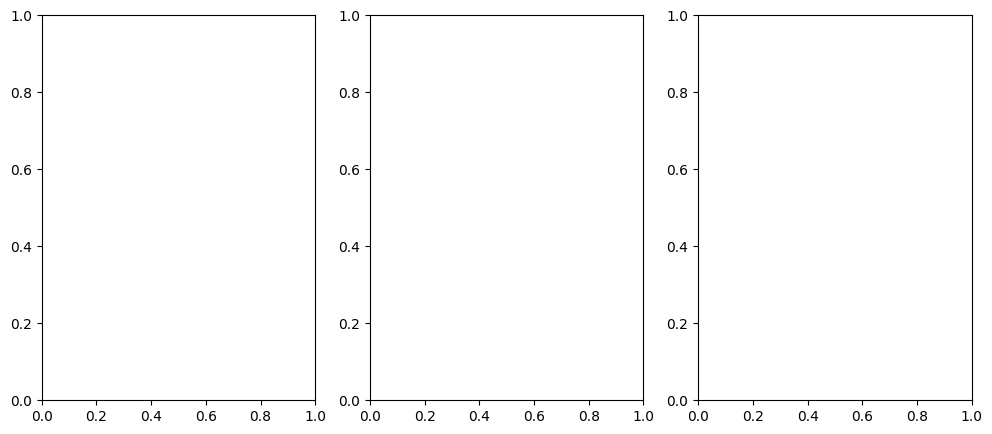

In [36]:
# Valores de frecuencia acerca de si los estudiantes opinan que la IA afecta positivamente y negativamente al pensamiento critico
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
frecuencias_mejora = df_bangladesh['IA help improving critical thinking and problem solving'].unique()
valores_mejora = df_bangladesh['IA help improving critical thinking and problem solving'].value_counts()
frecuencia_negativas = df_bangladesh['Harm of students thinking by using AI'].unique()
valores_negativos = df_bangladesh['Harm of students thinking by using AI'].value_counts()
frecuencia_negativas_estudiante = df_bangladesh['Creativity reduction by using AI of myself'].unique()
valores_negativos_estudiante = df_bangladesh['Creativity reduction by using AI of myself'].value_counts()
axs[0].bar(frecuencias_mejora, valores_mejora, color='orange')
axs[1].bar(frecuencia_negativas, valores_negativos, color='lightblue')
axs[2].bar(frecuencia_negativas_estudiante, valores_negativos_estudiante, color='yellow')
axs[1].set_xticklabels(frecuencia_negativas, rotation=45, ha='right')
plt.show()

Viendo los gráficos, podemos apreciar que tienen sentido y podemos relacionarlos ya que, a la izquierda una gran mayoria afirma que el uso de IA los ayuda al pensamiento crítico o a la resolución de problemas academicos, mientras que a la derecha una gran mayoria se mantiene neutral acerca de si el uso de IA perjudica en el pensamiento crítico o la resolución de problemas.

## Análisis Datos de NEM

In [17]:
ruta = 'ArchivosDatos/Rendimiento/NEM-'
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
dfs_rendimientos = []
for year in years:
    ruta_completa = ruta + year + '.csv'
    df = pd.read_csv(ruta_completa, sep=';')
    dfs_rendimientos.append(df)
df_unido = pd.concat(dfs_rendimientos)    

In [18]:
df_unido.head(5)

,RBD,COD_DEPE,AGNO_EGRESO,MRUN,NEM,PERCENTIL,PUESTO_10,PUESTO_30
0,8505,5,2017,17,"5,75",30,NO,SI
1,12716,3,2017,19,"5,63",40,NO,NO
2,3909,2,2017,346,"5,58",50,NO,NO
3,6830,3,2017,385,"5,58",60,NO,NO
4,16843,3,2017,386,"5,98",10,SI,SI


Ya que nos interesa ver el rendimiento academico de los estudiantes vamos a usar las columnas del NEM Y el AGNO_EGRESO, pero primero queremos ver si hay que hacer alguna conversion de tipo de dato:

In [20]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419898 entries, 0 to 212886
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   RBD          1419898 non-null  int64 
 1   COD_DEPE     1419898 non-null  int64 
 2   AGNO_EGRESO  1419898 non-null  int64 
 3   MRUN         1419898 non-null  int64 
 4   NEM          1419898 non-null  object
 5   PERCENTIL    1419898 non-null  int64 
 6   PUESTO_10    1419898 non-null  object
 7   PUESTO_30    1419898 non-null  object
dtypes: int64(5), object(3)
memory usage: 97.5+ MB


Nos interesaria convertir la columna NEM en un objeto de tipo float

In [22]:
df_unido['NEM'] = df_unido['NEM'].str.replace(',', '.')
df_unido['NEM'] = df_unido['NEM'].astype(float)
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419898 entries, 0 to 212886
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   RBD          1419898 non-null  int64  
 1   COD_DEPE     1419898 non-null  int64  
 2   AGNO_EGRESO  1419898 non-null  int64  
 3   MRUN         1419898 non-null  int64  
 4   NEM          1419898 non-null  float64
 5   PERCENTIL    1419898 non-null  int64  
 6   PUESTO_10    1419898 non-null  object 
 7   PUESTO_30    1419898 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 97.5+ MB


Ahora que tenemos nuestros tipos de datos correctos, nos gustaria ver la distribución del NEM en cada año.

Text(0.5, 0, 'Año de egreso')

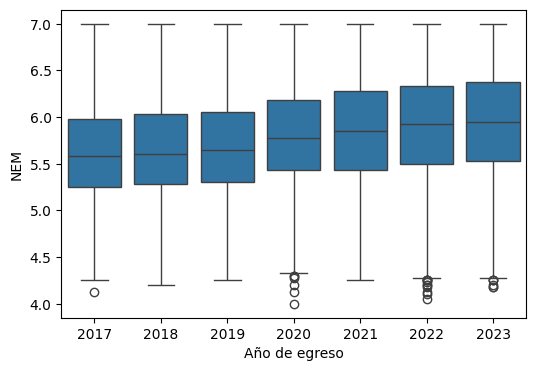

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(
    data=df_unido,
    x='AGNO_EGRESO',
    y='NEM'
)
ax.set_xlabel('Año de egreso')

En base a una de nuestra preguntas formuladas, podemos ver que en la distribución del nem de los estudiantes egresados ha ido lentamente en aumento, siendo a partir de 2020 donde empezo a haber un aumento significativo, esto puede deberse principalmente a la pandemia del COVID y tambien por consecuente la digitalización de muchos de los sistemas escolares requerido por la situación.